In [1]:
pip install deap

     |████████████████████████████████| 163kB 29.7MB/s 


gen	nevals	min    	max    
0  	150   	5.79767	80.1641
1  	143   	1.07146	100    
2  	134   	0.133436	100    
3  	134   	0.440508	100    
4  	137   	1.05965 	48.3717
5  	139   	0.0374798	47.1415
6  	142   	0.0489178	29.5747
7  	144   	0.0338497	28.8244
8  	131   	0.0107176	36.2786
9  	138   	0.0133807	25.2256
10 	139   	0.00707309	20.3377
11 	138   	0.00330407	100    
12 	124   	0.000766055	1.06362
13 	141   	0.000291709	45.8861
14 	138   	3.23557e-05	40.3132
15 	130   	4.12385e-05	100    
16 	138   	3.90011e-06	18.0328
17 	130   	3.44437e-06	27.1637
18 	142   	1.09873e-06	31.791 
19 	141   	2.49205e-07	9.51128
20 	139   	2.49205e-07	100    
21 	140   	2.05437e-08	100    
22 	135   	1.89094e-08	25.8562
23 	144   	3.65307e-09	36.5795
24 	138   	5.07895e-09	32.1409
25 	140   	4.22379e-10	42.1424
26 	136   	1.54895e-10	15.9899
27 	139   	1.39835e-10	10.3037
28 	137   	1.21233e-10	31.7543
29 	141   	3.12639e-13	4.14511
30 	130   	2.57216e-12	39.5816
31 	145   	8.17124e-14	32.3066
32 	137   

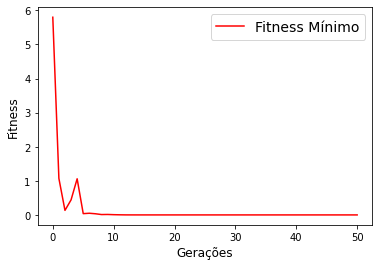

In [2]:
#!/usr/bin/env python
# coding: utf-8

# # Exemplo 1 Algoritmo Genético (GA) - Otimização de função multimodal
# 
# Existem diversas abordagens para otimização, dentre elas há os métodos clássicos como método de Newton e método do gradiente descendente. Embora sejam bastante utilizados, os métodos clássicos apresentam limitações como a dificuldade de distinguir entre ótimos locais e globais, necessidade de funções diferenciáveis e contínuas. Enquanto que métodos de otimização meta-heurísticos tais como Algoritmo Genético (GA) costumam ser eficientes para encontrar ótimos globais, sendo muitas vezes conhecido como otimizador global, podendo assim ser aplicado em diversas situações complexas.
# 
# **Problema:** Encontre o mínimo global da função Rastringin, cuja função é dada abaixo, com uso de algoritmo genético.

# \begin{equation*}
# f(x_{1},x_{2}) = 20+x_{1}^{2}+x_{2}^{2}-10[cos(2\pi x_{1})+cos(2\pi x_{2})]
# \end{equation*}

# **Domínio de busca:** $$ −5≤ 𝑥_𝑗 ≤5 ,𝑗 ∈(1,2) $$   
# **1 mínimo global em:** 
# $$
# (𝑥_1,𝑥_𝟐)=(0,0)
# $$
# **Valor mínimo global:** 
# $$
# f(0,0)= 0 
# $$

# 
# ### Importação dos pacotes
# O DEAP fornece várias bibliotecas que facilitam o trabalho e deverão ser importadas:  
# - base
# - creator
# - tools
# - algorithms
# 
# Outras blibliotecas auxiliares serão utilizadas nesse tutorial:
# - random
# - numpy
# - matplotlib.pyplot

# In[1]:


from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy as np
import matplotlib.pyplot as plt


# # Definindo parâmetros do Algoritmo Genético

# In[2]:


Numero_Genes = 2                # Definindo número de genes do cromossomo
Numero_Geracoes = 50            # Definindo número de gerações/iterações do AG
Intervalo_Inicial = [-5,5]      # Definindo um intervalo do qual os valores para genes da população inicial serão gerados.
Tamanho_Populacao = 150         # Definindo o tamanho da população
Probabilidade_Cruzamento = 0.9  # Definindo a probablidade de cruzamento
Probabilidade_Mutacao = 0.1     # Definindo a probabilidade de mutação
Penalizacao = 100               # Peso dado para indivíduo inviável


# Iniciando a toolbox da DEAP

# In[3]:


toolbox = base.Toolbox()


# ### Definindo o tipo de otimização 
# Como se trata de um problema de minimização deve-se criar a seguinte função conforme a DEAP

# In[4]:


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))


# ### Individuos e população
# O funcionamento do algoritmo genético se inicia com modelagem dos indivíduos e da população. Conforme a biblioteca DEAP, os seguintes passos devem ser seguidos:
# - Definir estrutura do individuo(list, set, etc)
# - Definir a função que irá gerar os alelos
# - Definir a função que irá gerar os individuos
# - Definir a função que irá gerar a população

# In[5]:


# Definindo a estrutura do indivíduo
creator.create("Individual", list, fitness=creator.FitnessMin)

# Registrando a função para geração dos genes dentro do intervalo dado
toolbox.register("attr_flt", random.uniform, Intervalo_Inicial[0],Intervalo_Inicial[1])

# Registrando função para gerar o indivíduo (nome,forma de gerar,Estrutura,funcao geradora,tam.)
toolbox.register("individual",tools.initRepeat,creator.Individual,toolbox.attr_flt,n=Numero_Genes) 

# Registrando função para gerar a população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# ### Criação da função de avaliação (fitness)
# A função de avaliação ou fitness trata-se de uma função responsável por determinar o valor de fitness para cada indivíduo de uma dada população 
# 
# Esta função varia conforme o problema tratado cabendo ao usuário o conhecimento sobre o problema para a implementação manual diferentemente das etapas anteriores que são criadas de forma paramétrica. No problema tratado, uma possível implementação é dada abaixo:

# In[6]:


# Função de avaliação ou fitness
def evaluate(individual):
    x1 = individual[0]    # gene referente a x1
    x2 = individual[1]    # gene referente a x2
    
    FO = y = 20 + (x1**2) + (x2**2) -10*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2)) #Função que queremos otimizar
    
    return FO,


# # Função de viabilidade
# Na maioria das situações os problemas de otimização possuem diversas restrições que devem ser respeitadas. Uma das formas para se adicionar estas restrições à busca do algoritmo é através da estratégia de penalização.
# 
# Na DEAP, esta estratégia pode ser implementada facilmente através da criação de uma função manualmente. As restrições do problema aqui tratado podem ser adicionadas conforme:

# In[7]:


def feasible(individual):
    x1 = individual[0]    # gene referente a x1
    x2 = individual[1]    # gene referente a x2
    
    if -5<=x1<=5 and -5<=x2<=5:
        return True
    return False
#A função retorn True se a solução(indivíduo) for viável e False caso não seja 


# ### Operadores
# Para o DEAP são considerados como operadores:
# - evaluate: operador para realizar o cálculo de fitness do indivíduo
# - mate: operador para realizar cruzamento de indivíduos
# - mutate: operador para realizar a mutação dos indivíduos
# - select: operador para selecionar os melhores de uma geração para outra  
# 
# Cada um desses operadores deve ser registrado. Seguindo a documentação do DEAP, damos um nome para o operador, seguido da função que ele irá realizar, seguido dos parametros dessa função.

# In[8]:


# Registrando função de fitness
toolbox.register("evaluate", evaluate)

#  Utilizando ferramenta da DEAP para penalização de soluções inviáveis e peso default  
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, Penalizacao))

# Registrando função que realiza cruzamento e o tipo utilizado
toolbox.register("mate", tools.cxBlend, alpha=0.5)

# Registrando função que realiza mutação e o tipo de mutação utilizado além de parâmetros do tipo
toolbox.register("mutate", tools.mutGaussian,mu=0,sigma=3, indpb = 0.1)

# Registrando função que realiza a seleção e o tipo utilizado
toolbox.register("select", tools.selTournament, tournsize=3)


# ### Funções adicionais
# Dependendo de cada caso, podemos desejar mostrar relatórios específicos. Para esse problema, criamos duas funçõs. Uma para imprimir os dados de um indivíduo e outra para plotar o gráfico das evoluções das gerações.
# 

# In[9]:


#Imprimir indivíduo
def print_ind(individual):
    x1 = individual[0]  
    x2 = individual[1]  
    FO = y = 20 + (x1**2) + (x2**2) -10*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2))
    print('Individuo:' + str(individual))
    print('x1: ' + str(x1))
    print('x2: ' + str(x2))
    print('FO: ' + str(FO))

#Plotar Gráfico
def plot_res(logbook):
    gen = logbook.select('gen')
    Min = logbook.select('min')
    
    plt.plot(gen,Min,'r-',label='Fitness Mínimo')
    plt.xlabel('Gerações',fontsize=12)
    plt.ylabel('Fitness',fontsize=12)
    plt.legend(fontsize = 14,loc = 'best')
    plt.rcParams['figure.figsize']=(11,7)
    
    plt.show()


# ### Algoritmo
# 
# Por fim, é necessário definir uma função main contendo a estrutura composta dos parametros do Algoritmo Genético e a logica que manipula a população.

# In[10]:


def main():
    random.seed(25) # semente de aleatório 

    # cria populacao inicial
    pop = toolbox.population(n=Tamanho_Populacao)
    
    #stats a serem guardados
    stats = tools.Statistics(key=lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("max", np.max)

    #Roda o algoritmo
    pop, logbook = algorithms.eaSimple(pop, toolbox, Probabilidade_Cruzamento, 
                                       Probabilidade_Mutacao, Numero_Geracoes, stats=stats)

    #Seleciona o melhor individuo da populacao resultante
    best_ind = tools.selSPEA2(pop, 1)

    #Imprime as informações do melhor individuo
    print_ind(best_ind[0])

    #Plota o Gráfico
    plot_res(logbook)
if __name__ == "__main__":
    main()


# # Fim
    
